## יעילות שינה

## מספר קבוצה : 14

#### מגישים:יובל שחר,עידן וידר,אור אריש

https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency קישור לאתר ממנו נלקחה הדאטה 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/OrArish/DataSet/main/Sleep_Efficiency.csv'
data = pd.read_csv(url)
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [3]:
data

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [4]:
data['bedtime_hour'] = pd.to_datetime(data['Bedtime']).dt.hour
data['wake_hour'] = pd.to_datetime(data['Wakeup time']).dt.hour
data['Age Group'] = pd.cut(data['Age'], bins=[0,18, 25, 40, 60, 70 ], labels=['0-18','student(18-25)', 'familyguy(25-40)', 'midlife crisis(40-60)', 'golden age(60-70)'])
data['Exercise Frequency Category'] = pd.cut(data['Exercise frequency'], bins=[0,1,2,3,4,5 ], labels=['0-1','1-2','2-3','3-4','4-5'])



##  A short explanation on sleep types:

**light sleep** -The first stage of sleep is a light, transitional phase where it's easy to be awakened. During this stage, muscle activity slows down, and the eyes often move slowly. This stage serves as a bridge between wakefulness and deeper sleep, typically lasting only a few minutes."








**deep sleep** - The second stage of sleep is a period of light sleep that precedes the deeper sleep stages. During this stage, the body repairs itself and regains energy. Heart rate begins to slow, and body temperature decreases. This stage plays a crucial role in physical recovery and energy restoration, preparing the body for the deeper, restorative stages of sleep that follow."








**REM sleep** -"The third stage of sleep, also called dream sleep, is characterized by rapid eye movement (REM). During this stage, muscles not involved in breathing are paralyzed. Cognitive activity peaks during REM sleep, which is when most dreaming occurs. 

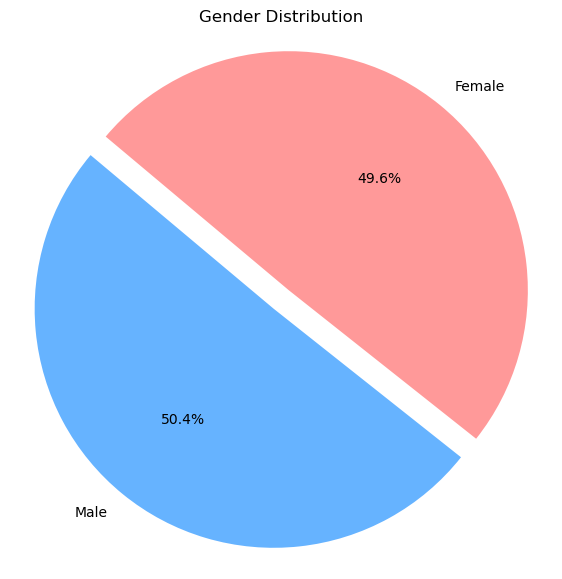

In [5]:
gender_distribution = data['Gender'].value_counts()


labels = ['Male', 'Female']

sizes = [gender_distribution['Male'], gender_distribution['Female']]
colors = ['#66b3ff', '#ff9999']  
explode = (0.1, 0) 
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  
plt.show()


## The impact of caffeine on sleep

![](https://raw.githubusercontent.com/OrArish/DataSet/main/picture_1.jpeg)

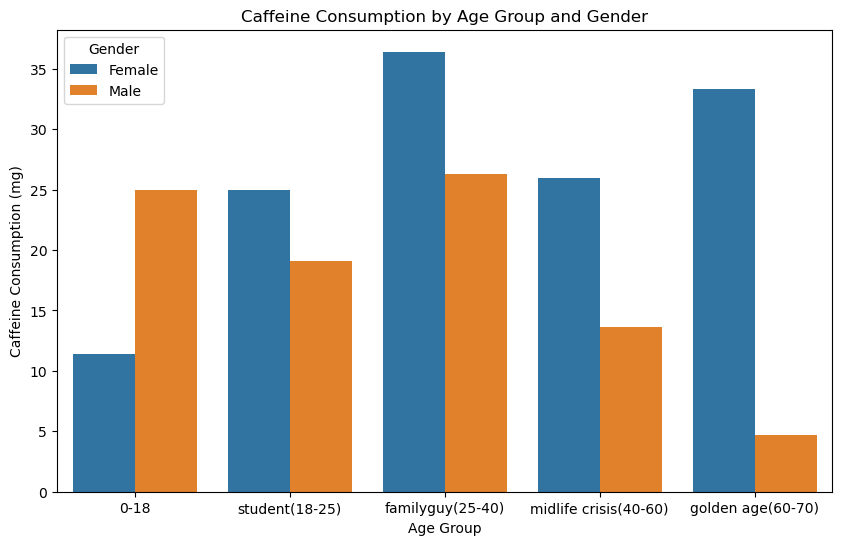

In [6]:

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Age Group', y='Caffeine consumption', hue='Gender',errorbar = None)
plt.title('Caffeine Consumption by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Caffeine Consumption (mg)')
plt.legend(title='Gender')
plt.show()


We examined the differences in caffeine consumption between men and women of all ages and found that women consume more caffeine.

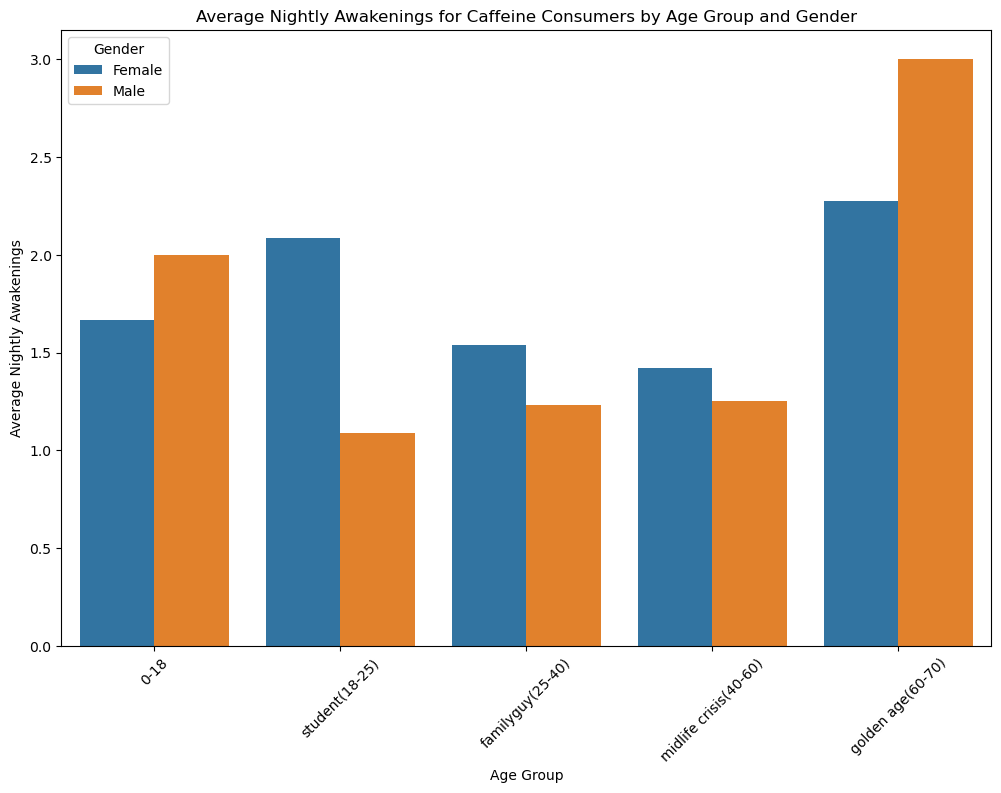

In [7]:
data['Consumes Caffeine'] = data['Caffeine consumption'] > 0

caffeine_consumers = data[data['Consumes Caffeine']]

plt.figure(figsize=(12, 8))
sns.barplot(data=caffeine_consumers, x='Age Group', y='Awakenings', hue='Gender', estimator=np.mean, errorbar=None)
plt.title('Average Nightly Awakenings for Caffeine Consumers by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Nightly Awakenings')
plt.legend(title='Gender')
plt.xticks(rotation=45) 
plt.show()


Age Group
midlife crisis(40-60)    186
familyguy(25-40)         164
student(18-25)            57
golden age(60-70)         31
0-18                      14
Name: count, dtype: int64
Age Group
midlife crisis(40-60)    0.411504
familyguy(25-40)         0.362832
student(18-25)           0.126106
golden age(60-70)        0.068584
0-18                     0.030973
Name: proportion, dtype: float64


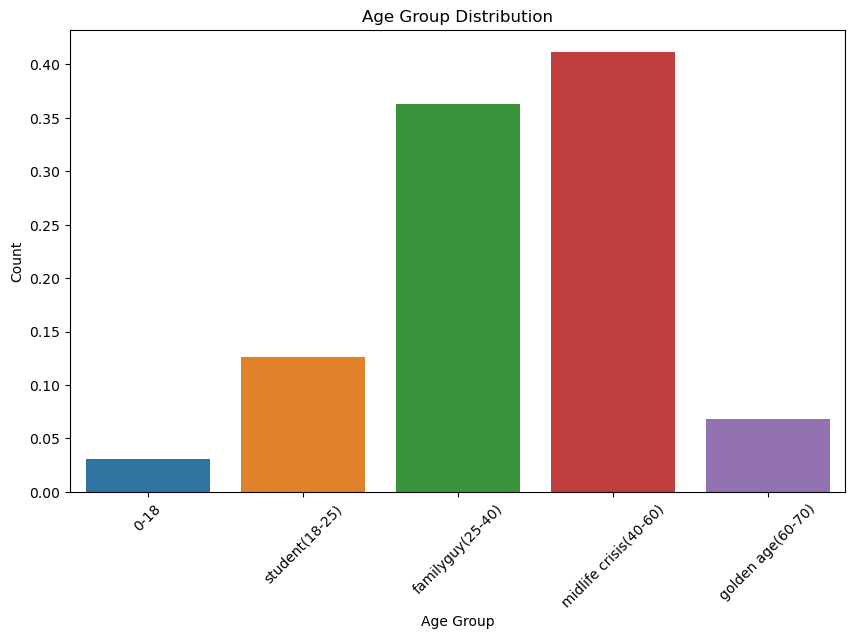

In [8]:

print(data['Age Group'].value_counts())
age_group_counts = data['Age Group'].value_counts(normalize=True)
print(age_group_counts)


plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.xticks(rotation=45)
plt.show()


After normalization, it can be seen that the population up to age 18 is not relevant because it is less than 5 percent. We will focus on the population aged 60 to 70

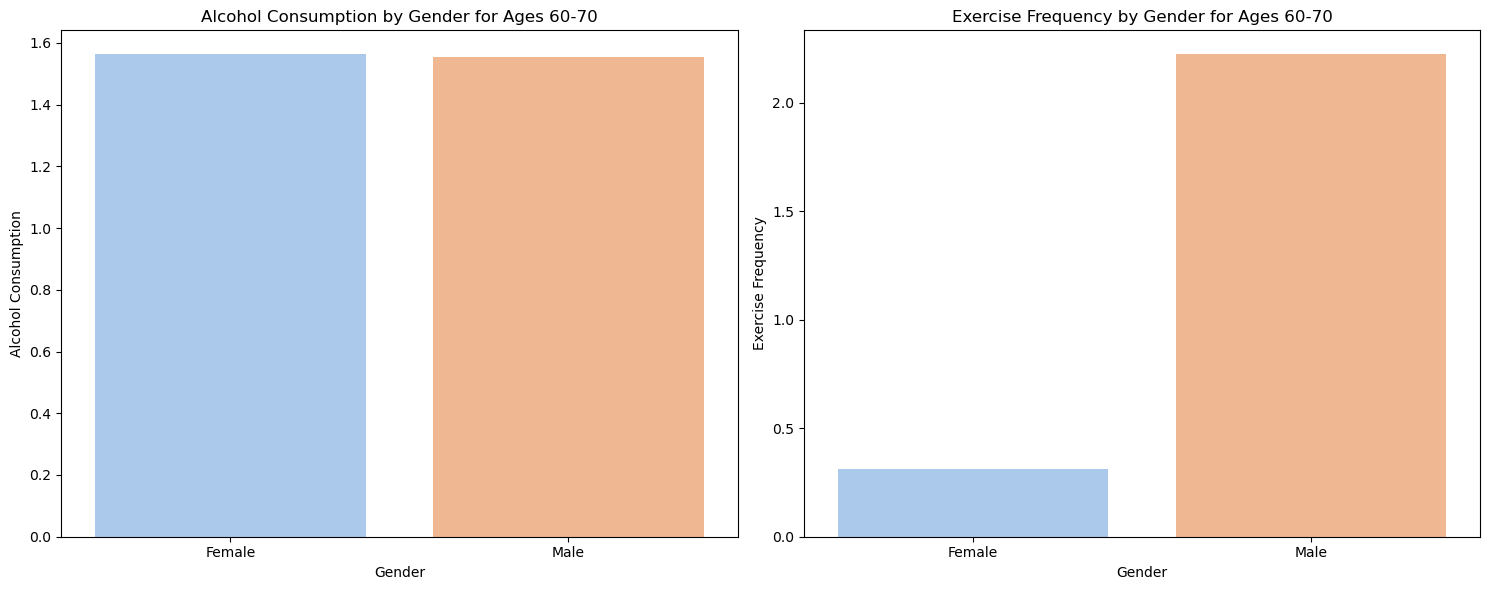

In [9]:


age_group_60_70 = data[(data['Age'] >= 60) & (data['Age'] <= 70)]


fig, axes = plt.subplots(ncols=2, figsize=(15, 6))


sns.barplot(data=age_group_60_70, x='Gender', y='Alcohol consumption', errorbar=None, palette='pastel', ax=axes[0])
axes[0].set_title('Alcohol Consumption by Gender for Ages 60-70')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Alcohol Consumption')


sns.barplot(data=age_group_60_70, x='Gender', y='Exercise frequency', errorbar=None, palette='pastel', ax=axes[1])
axes[1].set_title('Exercise Frequency by Gender for Ages 60-70')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Exercise Frequency')


plt.tight_layout()
plt.show()


## Conclusion


"We examined the exceptional age group of 50-70 and found that the reason for higher wakefulness among men is due to higher physical activity. In order to rule out other factors, we saw in the graph that alcohol consumption among women and men is identical."








## The impact of smoking and workouts on effcenciy of sleep.



![](https:/raw.githubusercontent.com/OrArish/DataSet/main/picture2.jpeg)

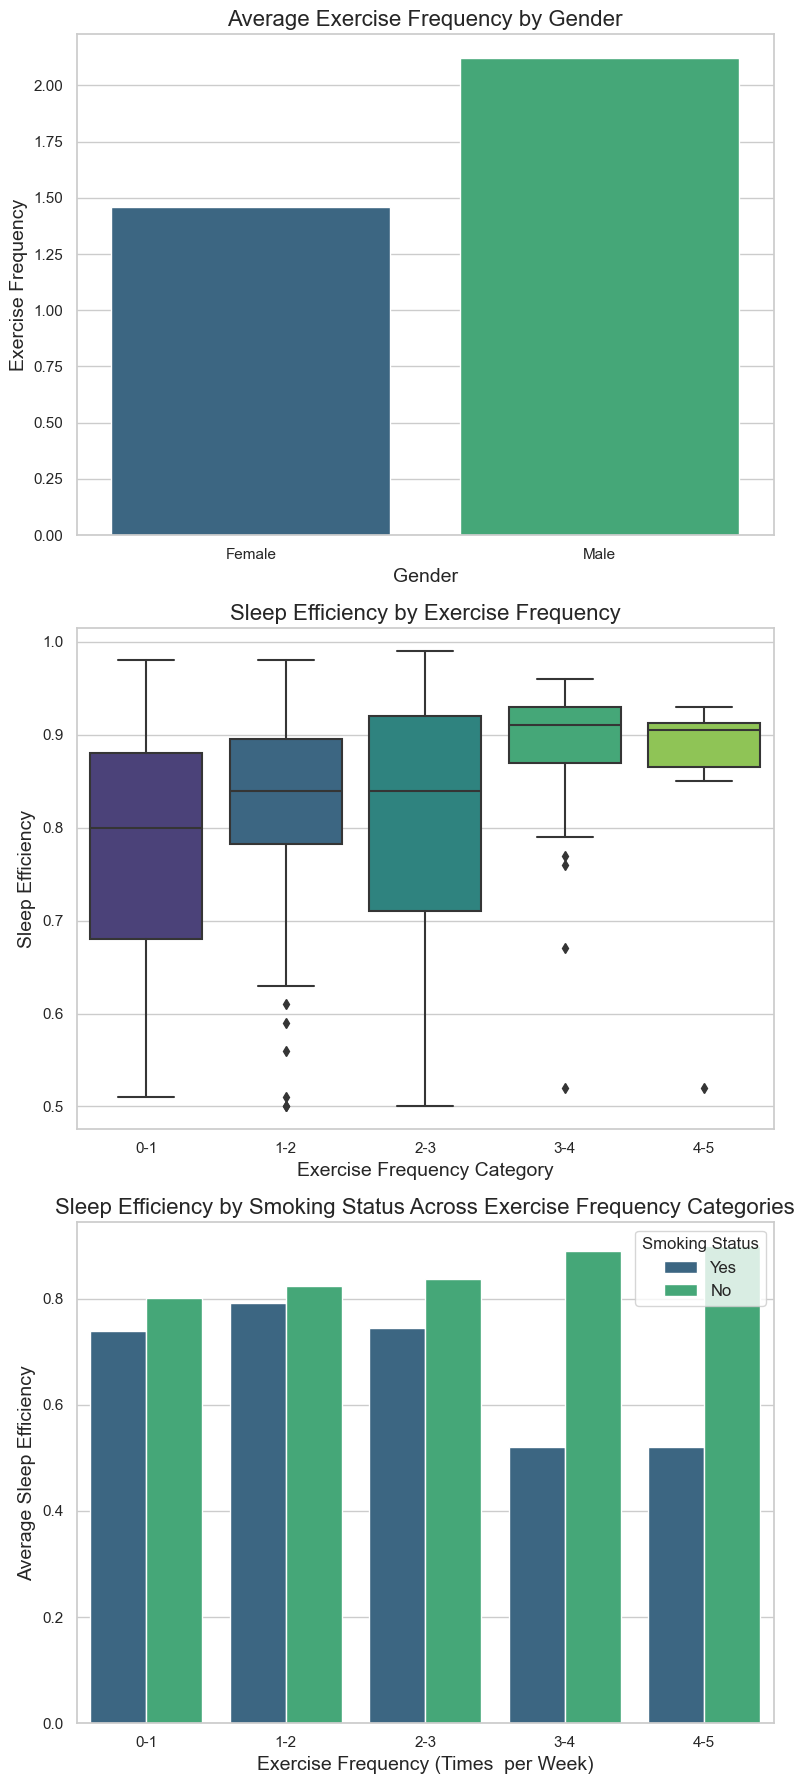

In [10]:
sns.set_theme(style="whitegrid")


fig, axes = plt.subplots(3, 1, figsize=(8, 18))  


sns.barplot(data=data, x='Gender', y='Exercise frequency', palette='viridis', errorbar=None, ax=axes[0])
axes[0].set_title('Average Exercise Frequency by Gender', fontsize=16)
axes[0].set_xlabel('Gender', fontsize=14)
axes[0].set_ylabel('Exercise Frequency', fontsize=14)


sns.boxplot(data=data, x='Exercise Frequency Category', y='Sleep efficiency', palette='viridis', ax=axes[1])
axes[1].set_title('Sleep Efficiency by Exercise Frequency', fontsize=16)
axes[1].set_xlabel('Exercise Frequency Category', fontsize=14)
axes[1].set_ylabel('Sleep Efficiency', fontsize=14)



sns.barplot(data=data, x='Exercise Frequency Category', y='Sleep efficiency', hue='Smoking status',palette ='viridis', ax=axes[2],errorbar =None)
axes[2].set_title('Sleep Efficiency by Smoking Status Across Exercise Frequency Categories', fontsize=16)
axes[2].set_xlabel('Exercise Frequency (Times  per Week)', fontsize=14)
axes[2].set_ylabel('Average Sleep Efficiency', fontsize=14)
axes[2].legend(title='Smoking Status', fontsize=12)


plt.tight_layout()


plt.show()

As you can see from the bar chart above .within each group, people who smoke have lower average sleep efficiency.

## conclusion



Initially, we examined the population of exercisers by gender and saw no significant difference. Then we built a graph to check if there is a relationship between the frequency of workouts and sleep quality - we found that there is a relationship between the amount of exercise and sleep efficiency. We examined the population of exercisers in comparison to smokers and non-smokers and saw a significant difference. Additionally, we wanted to see the amount of impact that the frequency of workouts has on sleep efficiency among smokers versus non-smokers. It can be seen that when the number of workouts is 4-5 times a week, there is a much greater difference in sleep quality among non-smokers compared to smokers


##  what is the differnce betweem smoker cummunity to non smoker cummunity?

In [11]:
mean_sleep_duration = data['Sleep duration'].groupby(data['Smoking status']).mean()
print(mean_sleep_duration)

Smoking status
No     7.463087
Yes    7.470779
Name: Sleep duration, dtype: float64


<Axes: xlabel='Smoking status', ylabel='wake_hour'>

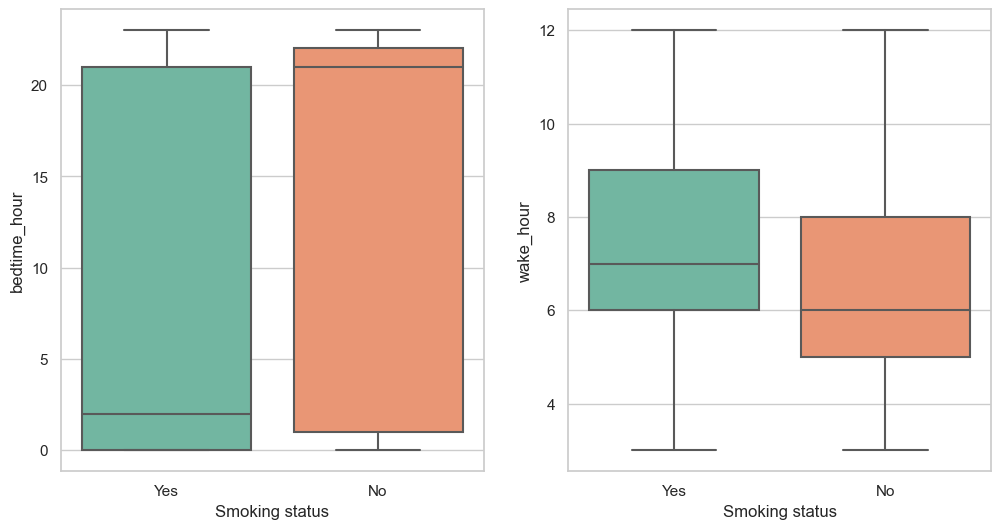

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Smoking status', y='bedtime_hour', palette='Set2')
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Smoking status', y='wake_hour', palette='Set2')

In [13]:
data['good_sleep'] = data['Sleep duration']*data['REM sleep percentage']*0.01
data['bad_sleep'] = data['Sleep duration']*data['Light sleep percentage']*0.01
data['deep_sleep'] = data['Sleep duration']*data['Deep sleep percentage']*0.01
data

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,...,Smoking status,Exercise frequency,bedtime_hour,wake_hour,Age Group,Exercise Frequency Category,Consumes Caffeine,good_sleep,bad_sleep,deep_sleep
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,...,Yes,3.0,1,7,golden age(60-70),2-3,False,1.08,0.720,4.200
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,...,Yes,3.0,2,9,golden age(60-70),2-3,False,1.33,3.710,1.960
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,...,No,3.0,21,5,familyguy(25-40),2-3,False,1.60,0.800,5.600
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,...,Yes,1.0,2,8,familyguy(25-40),0-1,True,1.38,3.120,1.500
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,...,No,3.0,1,9,midlife crisis(40-60),2-3,False,2.16,1.440,4.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,...,No,5.0,22,5,familyguy(25-40),4-5,False,1.65,1.575,4.275
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,...,No,3.0,21,3,midlife crisis(40-60),2-3,True,1.68,0.900,3.420
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,...,Yes,0.0,23,7,familyguy(25-40),NaN,False,1.70,4.080,2.720
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,...,No,3.0,21,4,midlife crisis(40-60),2-3,False,1.26,0.700,5.040


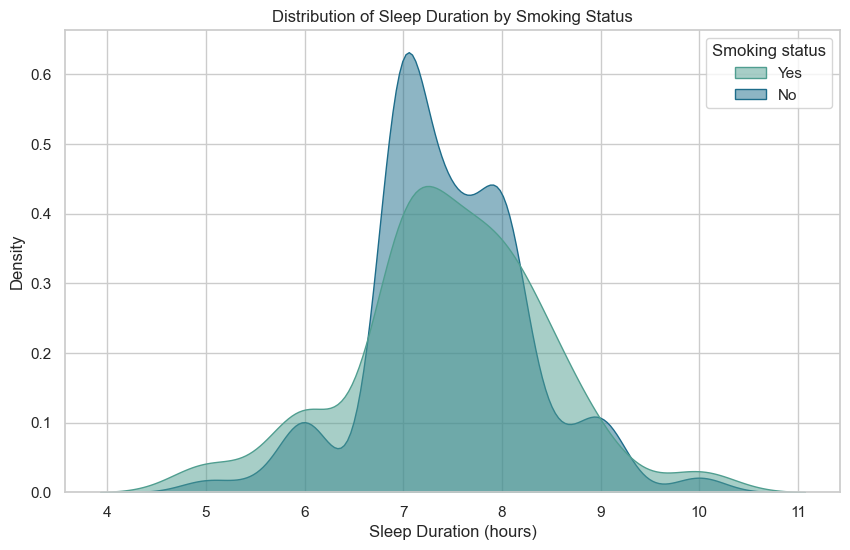

In [14]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=data, x='Sleep duration', hue='Smoking status', fill=True, common_norm=False, palette="crest", alpha=0.5)
plt.title('Distribution of Sleep Duration by Smoking Status')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Density')
plt.show()


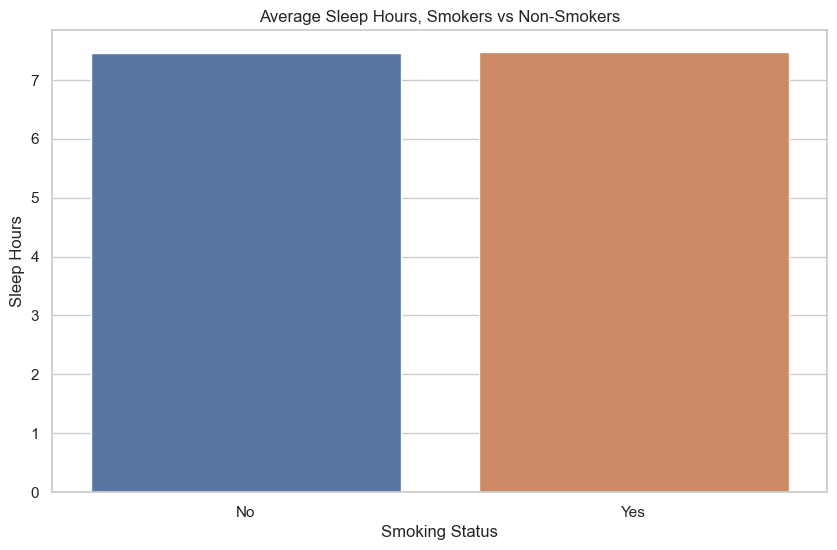

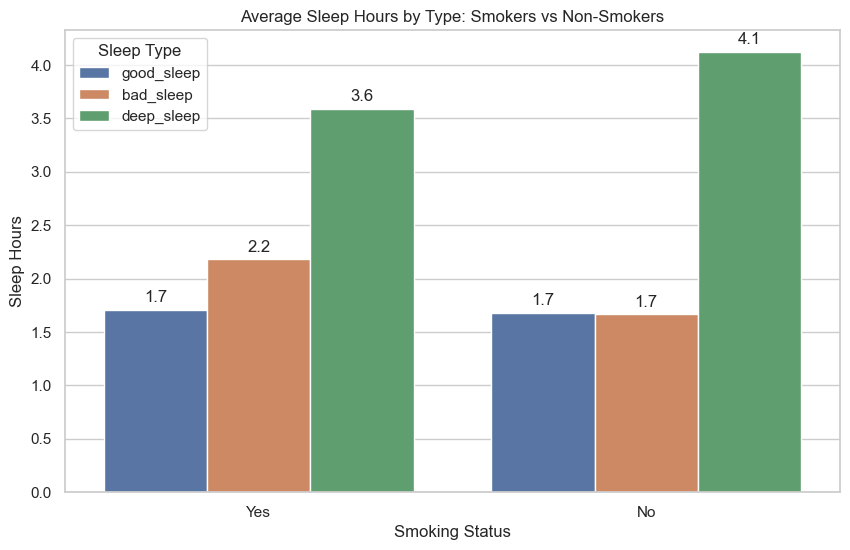

In [15]:
melted_df = pd.melt(data, id_vars='Smoking status', value_vars=['good_sleep','bad_sleep','deep_sleep'], 
                      var_name='Sleep Type', value_name='avg_sleep_hours_duration')
df = data.pivot_table(index ='Smoking status',values ='Sleep duration',aggfunc="mean").reset_index()
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df, x='Smoking status', y='Sleep duration')

plt.title('Average Sleep Hours, Smokers vs Non-Smokers')
plt.xlabel('Smoking Status')
plt.ylabel('Sleep Hours')
plt.show()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=melted_df, x='Smoking status', y='avg_sleep_hours_duration', hue='Sleep Type',errorbar=None)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')


plt.title('Average Sleep Hours by Type: Smokers vs Non-Smokers')
plt.xlabel('Smoking Status')
plt.ylabel('Sleep Hours')
plt.show()





## conclusion:

We wanted to see if smoking affects sleep hours and sleep quality. We found that smokers have a more varied sleep duration, meaning many sleep more than 8 hours or less than 7 hours compared to the non-smoking population

Additionally, we discovered that although on average both populations sleep the same amount, the non-smoking population sleeps much better (deep sleep) compared to the smoking population, which experiences more light sleep.